In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go

In [3]:
path = 'Downloads/Data Science Projects/online_shoppers_intention.csv'
df = pd.read_csv(path)

In [4]:
#Finding Missing Values
missing = df.isnull().sum()
print(missing)

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64


In [ ]:
#Filling missing values with 0
df.fillna(0, inplace = True)
x = df.iloc[:, [5, 6]].values
x.shape

We will try to predict revenue using only ProductRelated_Duration and BounceRates features.

ProductRelated_Duration is the  total time spent in each of the page categories.

Bounce Rate is the percentage of all sessions on your site in which users viewed only a single page

In [9]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,11):
    km = KMeans(n_clusters=i,
                init = 'k-means++',
                max_iter = 300,
                n_init = 10,
                random_state = 0,
               algorithm = 'full',
               tol = 0.001)
    km.fit(x)
    labels = km.labels_
    wcss.append(km.inertia_)

Plotting inertia ,which is a measure of how internally coherent clusters are,against the number of clusters .

We try to find the optimal number of clusters  to cluster ProductRelated_Duration and BounceRates features

The optimal value is where the curve is steepest

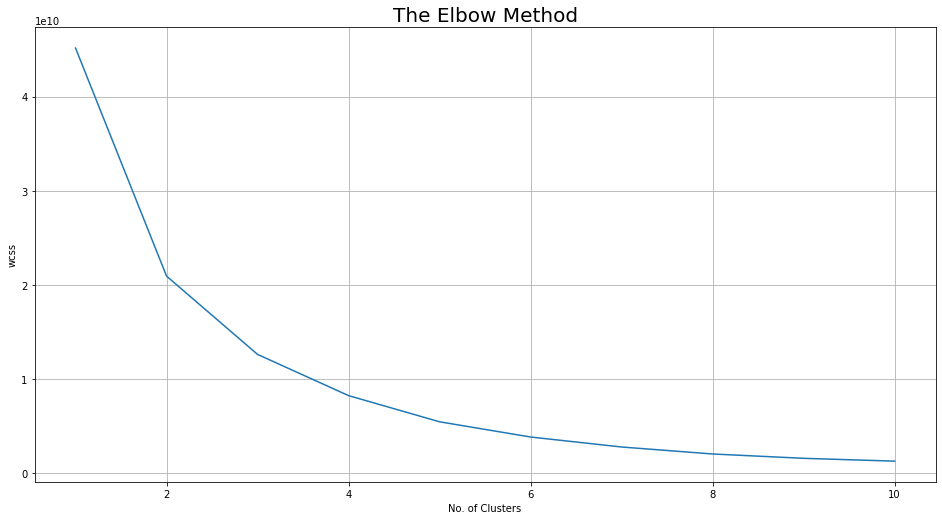

In [10]:
plt.rcParams['figure.figsize'] = (13, 7)
plt.plot(range(1, 11), wcss)
plt.grid()
plt.tight_layout()
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

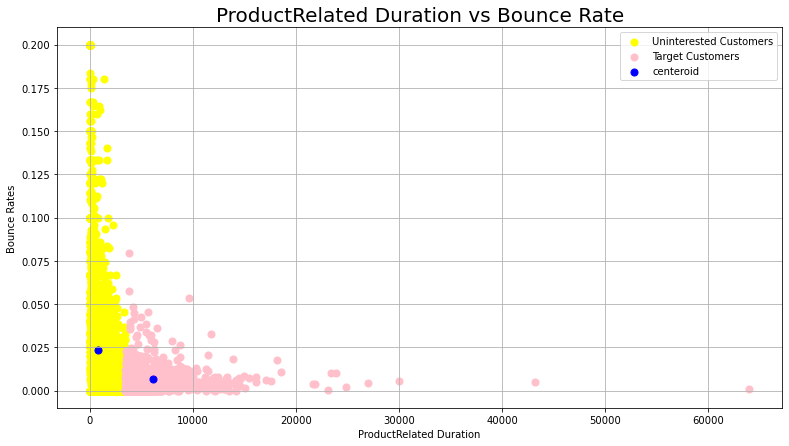

In [11]:
km = KMeans(n_clusters = 2, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
# get predicted cluster index for each sample: 0, 1, 2
y_means = km.fit_predict(x)

plt.scatter(x[y_means == 0, 0], x[y_means == 0, 1], s = 50, c = 'yellow', label = 'Uninterested Customers')
plt.scatter(x[y_means == 1, 0], x[y_means == 1, 1], s = 50, c = 'pink', label = 'Target Customers')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:, 1], s = 50, c = 'blue' , label = 'centeroid')

plt.title('ProductRelated Duration vs Bounce Rate', fontsize = 20)
plt.grid()
plt.xlabel('ProductRelated Duration')
plt.ylabel('Bounce Rates')
plt.legend()
plt.show()

Looking at this plot we come to the conclusion that  customers who spend little time in product-related website tend to exit 
the website after viewing only one page,whereas when they spend more time they view more than one page before exiting ,
namely viewing more than one page in a website means more time spending in that website


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels_true = le.fit_transform(df['Revenue'])

In [14]:
# get predicted clustering result label
labels_pred = y_means


In [15]:
# print adjusted rand index, which measures the similarity of the two assignments
from sklearn import metrics
score = metrics.adjusted_rand_score(labels_true, labels_pred)
print("Adjusted rand index: ")
print(score)

Adjusted rand index: 
0.08344649929017146


Adjusted Rand index(ARI) is a measure of how similar are  two sets (true labels and predicted labels). When ARI 
is 1 then the two sets are identical. In our case ARI is very small indicating that the two groups of labels are unlike

In [16]:
# print confusion matrix
#cm = metrics.plot_confusion_matrix(None, labels_true, labels_pred)
#print(cm)

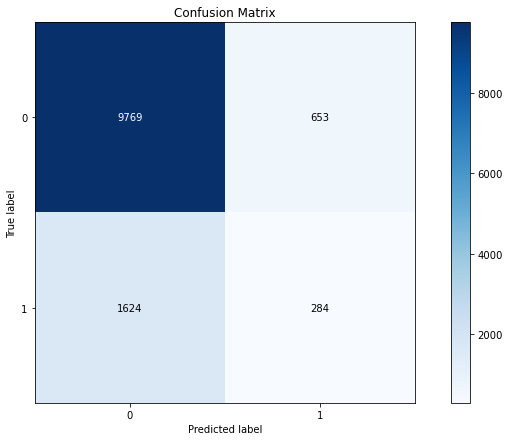

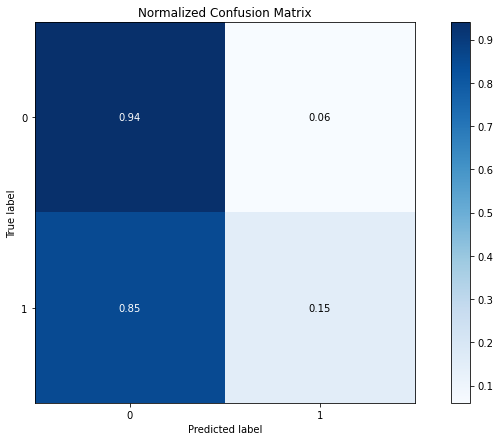

In [20]:
import scikitplot as skplt
plt_1 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=False)
plt_2 = skplt.metrics.plot_confusion_matrix(labels_true, labels_pred, normalize=True)

It is clear from the confusion matrix that we have classify many successfull revenues as 
uninterested customers so there are are still a lot of customers targets